<a href="https://colab.research.google.com/github/ojasvinaik13/GRIP/blob/main/Prediction_Using_UnsupervisedML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction using Unsupervised Machine Learning
## Mihir Dholakia

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loading dataset

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
iris_dataset = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Using Elbow method to determine optimum number of clusters

In [3]:
X = iris_dataset.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
ss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(X)
    ss.append(kmeans.inertia_)

Plotting a Line graph to observe the elbow

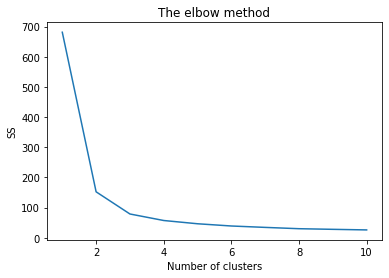

In [4]:
plt.plot(range(1, 11), ss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('SS')
plt.show()

By observing the graph, we can conclude that the optimum number of clusters would be 3 since this is the point where SS doesn't decrease significantly with every iteration

Creating K Means classifier

In [5]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


Visualising the Clusters along with their centroids

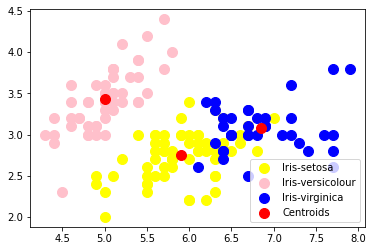

In [7]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'yellow', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'pink', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()